In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
"""
모델을 만드는 방식
1. Sequential : 기존 keras에 쓴느 방식, 쉽지만 자율성이 떨어짐
2. Functional
3. Model sub-Classing : 진입장벽은 높지만, 수준 높은 모델 구축 가능
"""

'\n모델을 만드는 방식\n1. Sequential : 기존 keras에 쓴느 방식, 쉽지만 자율성이 떨어짐\n2. Functional\n3. Model sub-Classing : 진입장벽은 높지만, 수준 높은 모델 구축 가능\n'

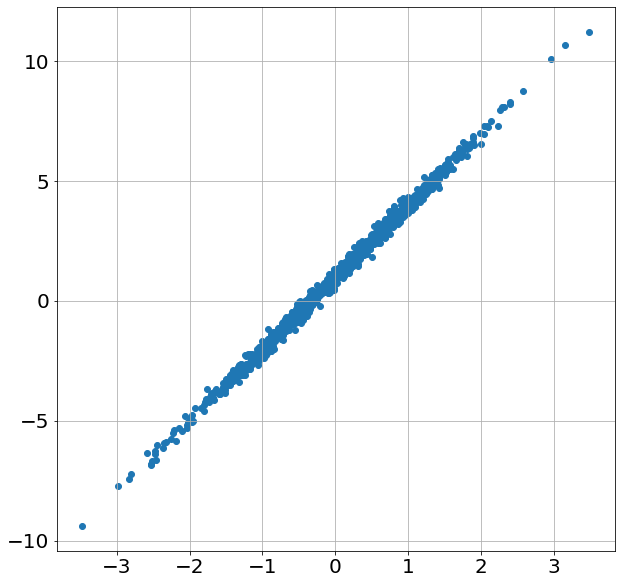

In [17]:
x_train = tf.random.normal(shape = (1000,), dtype = tf.float32)
y_train = 3*x_train + 1 + 0.2*tf.random.normal(shape = (1000,), dtype = tf.float32)

x_test = tf.random.normal(shape = (300,), dtype = tf.float32)
y_test = 3*x_test + 1 + 0.2*tf.random.normal(shape = (300,), dtype = tf.float32)


fig, ax = plt.subplots(figsize= (10,10))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize = 20)
ax.grid()


In [19]:
# sequential 방식으로 만ㄷ르어 주기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, activation = 'linear')
])
model.compile(loss = 'mean_squared_error',
             optimizer = 'SGD')

model.fit(x_train, y_train, epochs = 20, verbose = 1)
model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 11.6174
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 3.2168
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9072
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 13/20
32/32 [=============================

0.03559122234582901

In [30]:
# model sub-classing 방식 
class LinearPredictor(tf.keras.Model):
    def __init__(self):
        super(LinearPredictor, self).__init__()
        
        self.d1 = tf.keras.layers.Dense(units = 1, activation = 'linear')
    
    def call(self, x): # forward 진행 해주기
        x = self.d1(x)
        return x 

EPOCHS = 10
lr = 0.01

model  = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate = lr)

for epoch in range(EPOCHS):
    for x,y in zip(x_train, y_train):
        # forward
        x = tf.reshape(x, (1,1))
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
        
        # backpropagation
        gradients = tape.gradient(loss, model.trainable_variables) # loss에 대해서 나머지 gradient 구하기
        
        # update
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print("Epoch: {}  Train_loss: {:0.4f}".format(epoch+1, loss))
        

Epoch: 1  Train_loss: 0.00
Epoch: 2  Train_loss: 0.00
Epoch: 3  Train_loss: 0.00
Epoch: 4  Train_loss: 0.00
Epoch: 5  Train_loss: 0.00
Epoch: 6  Train_loss: 0.00
Epoch: 7  Train_loss: 0.00
Epoch: 8  Train_loss: 0.00
Epoch: 9  Train_loss: 0.00
Epoch: 10  Train_loss: 0.00
